In [8]:
import os
import cv2
import numpy as np

dir_name = 'dataset/faces'
X = []
y = []
target_names = []
person_id = 0
h, w = 100, 100  # You can adjust the size

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    if os.path.isdir(dir_path):
        for image_name in os.listdir(dir_path):
            image_path = os.path.join(dir_path, image_name)
            img = cv2.imread(image_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized_image = cv2.resize(gray, (h, w))
            X.append(resized_image.flatten())
            y.append(person_id)
        target_names.append(person_name)
        person_id += 1

X = np.array(X)
y = np.array(y)
print(f"Loaded {X.shape[0]} images from {len(target_names)} classes.")


Loaded 442 images from 9 classes.


In [9]:
mean_face = np.mean(X, axis=0)

In [10]:
X_mean_zero = X - mean_face

In [15]:
small_cov_matrix = np.dot(X_mean_zero, X_mean_zero.T)

In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(small_cov_matrix)

In [17]:
k = 100  # Number of principal components to keep
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, :k]

In [20]:
eigenfaces = np.dot(X_mean_zero.T, eigenvectors)
eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0)  # Normalize the eigenfaces

In [21]:
signatures = np.dot(X_mean_zero, eigenfaces)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(signatures, y, test_size=0.4, random_state=42)

# Train the ANN
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=1e-4, solver='adam', verbose=10, tol=1e-4, random_state=42)
clf.fit(X_train, y_train)

# Test the ANN
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Iteration 1, loss = 31.98780555
Iteration 2, loss = 31.24171816
Iteration 3, loss = 30.48154707
Iteration 4, loss = 29.72793698
Iteration 5, loss = 28.52948360
Iteration 6, loss = 26.63726473
Iteration 7, loss = 25.54281545
Iteration 8, loss = 23.95261340
Iteration 9, loss = 22.93750814
Iteration 10, loss = 20.79645585
Iteration 11, loss = 18.67545967
Iteration 12, loss = 17.42347004
Iteration 13, loss = 16.43749606
Iteration 14, loss = 14.75689679
Iteration 15, loss = 13.29899588
Iteration 16, loss = 12.23796212
Iteration 17, loss = 11.63582767
Iteration 18, loss = 10.91557307
Iteration 19, loss = 10.01784228
Iteration 20, loss = 9.24100764
Iteration 21, loss = 8.51343288
Iteration 22, loss = 7.19235088
Iteration 23, loss = 6.16496987
Iteration 24, loss = 5.61740708
Iteration 25, loss = 5.09295705
Iteration 26, loss = 4.59556708
Iteration 27, loss = 4.05900186
Iteration 28, loss = 3.09821748
Iteration 29, loss = 2.41270653
Iteration 30, loss = 1.86993257
Iteration 31, loss = 1.4993688

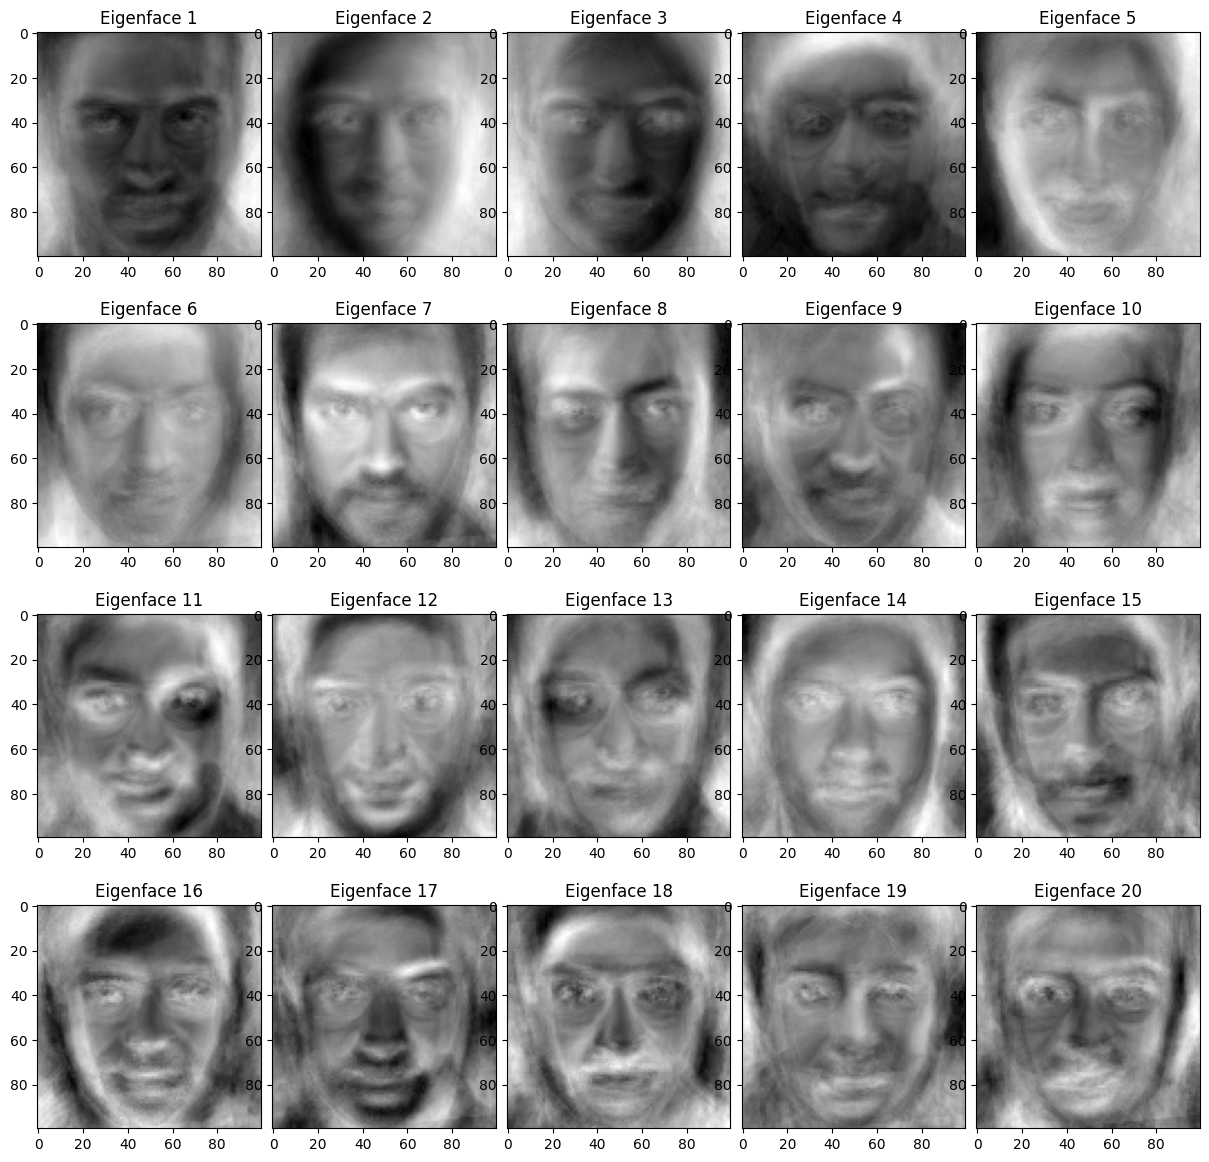

In [60]:
n_eigenfaces = 20  

def plot_top_eigenfaces(eigenfaces, h, w, n_eigenfaces):
    fig, axes = plt.subplots(4, n_eigenfaces // 4, figsize=(15, 15))
    axes = axes.ravel()
    for i in range(n_eigenfaces):
        ax = axes[i]
        eigenface = eigenfaces[:, i].reshape((h, w))
        ax.imshow(eigenface, cmap='gray')
        ax.set_title(f"Eigenface {i+1}")
        ax.axis('on')
    plt.subplots_adjust(wspace=0.05, hspace=0.03)
    plt.show()

plot_top_eigenfaces(eigenfaces, h, w, n_eigenfaces)


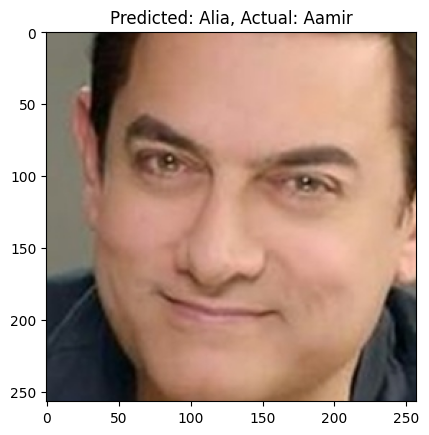

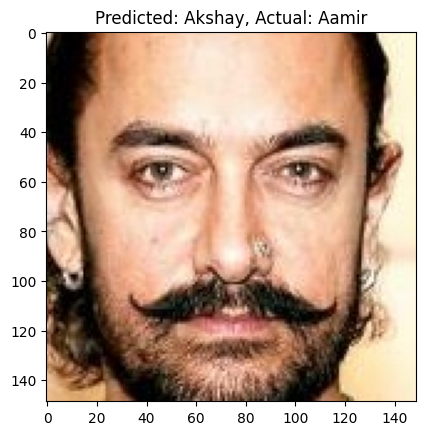

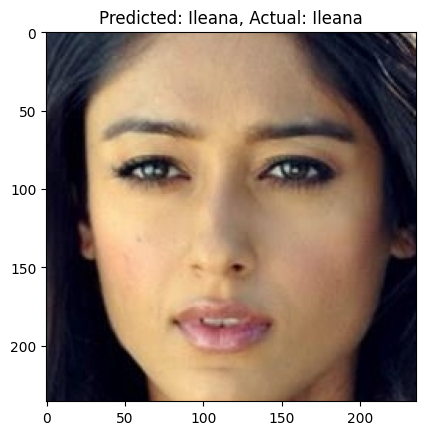

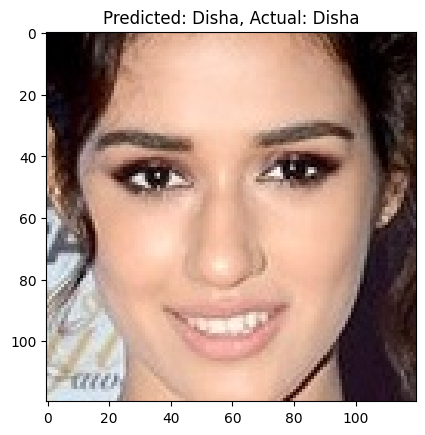

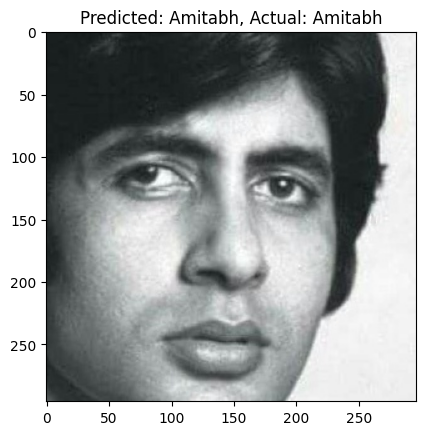

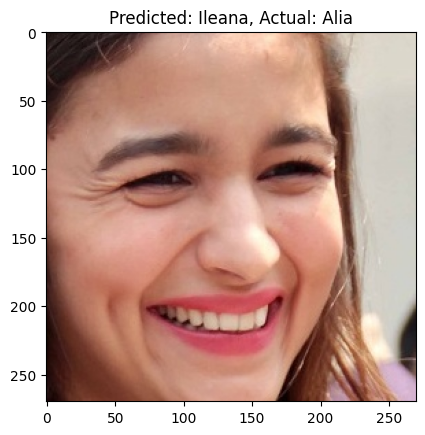

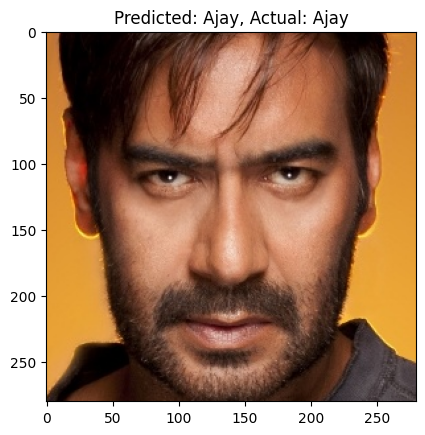

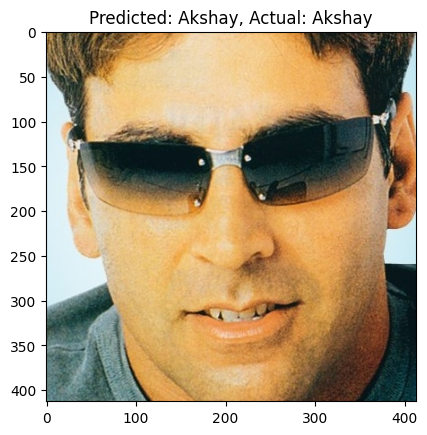

Unique predicted labels: [1 2 3 4 6 8]
Unique actual labels: [0 1 2 3 4 6 8]


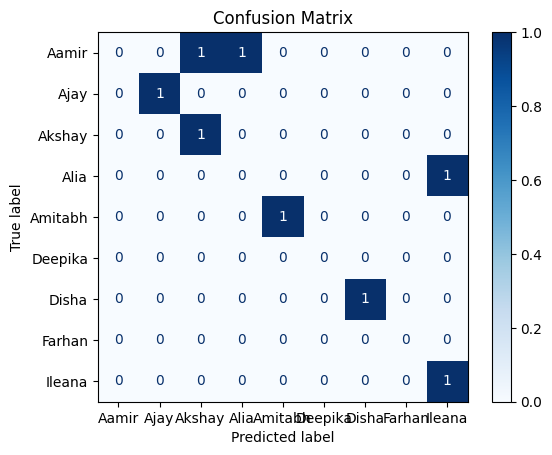

Classification Report:
              precision    recall  f1-score   support

       Aamir       0.00      0.00      0.00         2
        Ajay       1.00      1.00      1.00         1
      Akshay       0.50      1.00      0.67         1
        Alia       0.00      0.00      0.00         1
     Amitabh       1.00      1.00      1.00         1
     Deepika       0.00      0.00      0.00         0
       Disha       1.00      1.00      1.00         1
      Farhan       0.00      0.00      0.00         0
      Ileana       0.50      1.00      0.67         1

   micro avg       0.62      0.62      0.62         8
   macro avg       0.44      0.56      0.48         8
weighted avg       0.50      0.62      0.54         8



c:\Users\91843\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91843\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91843\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

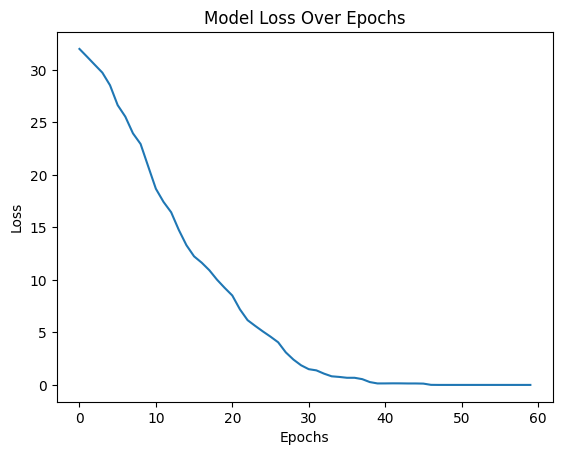

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def predict_faces(image_paths):
    predicted_labels = []
    actual_labels = []

    for image_path in image_paths:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error reading image {image_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w)).flatten()
        mean_aligned_face = resized_image - mean_face
        projected_face = np.dot(mean_aligned_face, eigenfaces)
        predicted_label = clf.predict([projected_face])[0]
        
        actual_label = os.path.basename(os.path.dirname(image_path))
        actual_label_index = target_names.index(actual_label)
        predicted_labels.append(predicted_label)
        actual_labels.append(actual_label_index)
      
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted: {target_names[predicted_label]}, Actual: {actual_label}")
        plt.show()
    
    return predicted_labels, actual_labels

test_image_paths = [
    'dataset/faces/Aamir/face_27.jpg',
    'dataset/faces/Aamir/face_46.jpeg',
    'dataset/faces/Ileana/face_20.jpg',
    'dataset/faces/Disha/face_14.jpg',
    'dataset/faces/Amitabh/face_31 - Copy.jpg',
    'dataset/faces/Alia/face_11.jpg',
    'dataset/faces/Ajay/face_28.jpg',
    'dataset/faces/Akshay/face_18.jpg'
]

predicted_labels, actual_labels = predict_faces(test_image_paths)

print("Unique predicted labels:", np.unique(predicted_labels))
print("Unique actual labels:", np.unique(actual_labels))

predicted_label_names = [target_names[label] for label in predicted_labels]
actual_label_names = [target_names[label] for label in actual_labels]

cm = confusion_matrix(actual_label_names, predicted_label_names, labels=target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(actual_label_names, predicted_label_names, labels=target_names))

history = clf.loss_curve_

plt.plot(history)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
